# 6.02: EDA using Seaborn - Housing Price Prediction

<div align="center">
  <img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" alt="Wine Quality Investigation" width="800px"/>
</div>


DataSet Link : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [41]:
# import
import numpy as np
import pandas as pd

# matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("Housing.csv")

In [76]:
df.head(5).style.background_gradient(cmap="YlOrRd")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
# dataframe shape
df.shape

(545, 13)

In [45]:
# dataframe columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [68]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [47]:
# check null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


## Univariate Analysis
- Univariate data refers to a dataset where each observation is associated with only one variable

In [72]:
!pip install pandas

In [74]:
df['bedrooms'].value_counts()

pandas.core.series.Series

In [50]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [51]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

In [52]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

**1. Bar Plot**

In [53]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

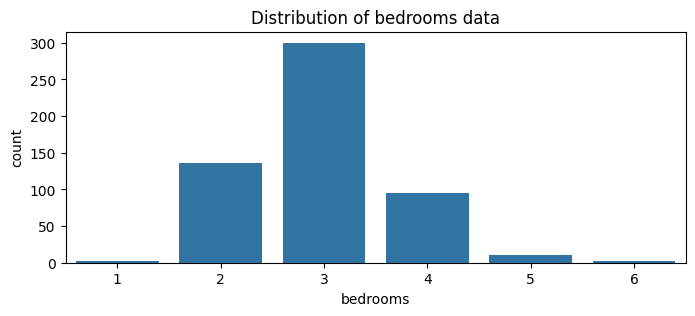

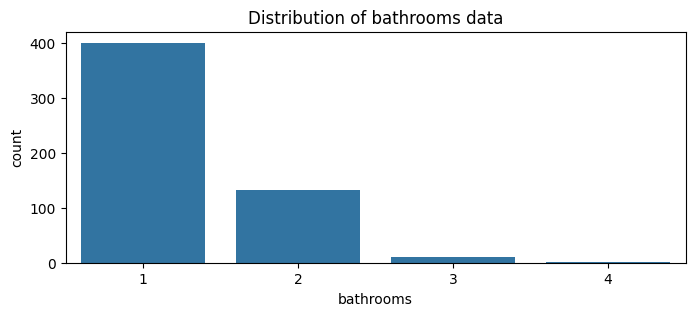

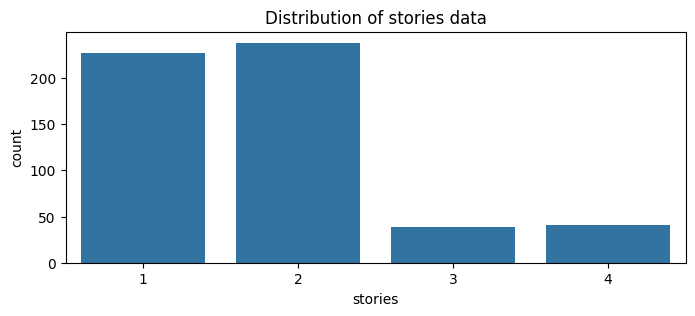

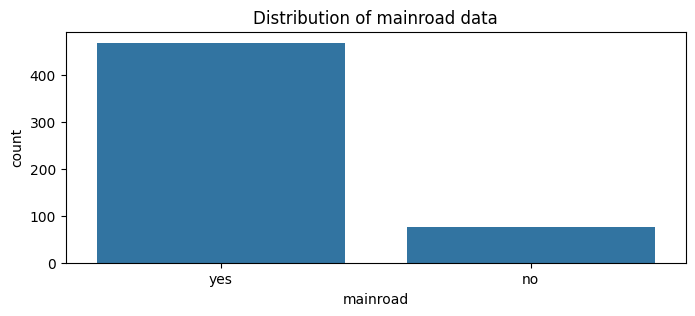

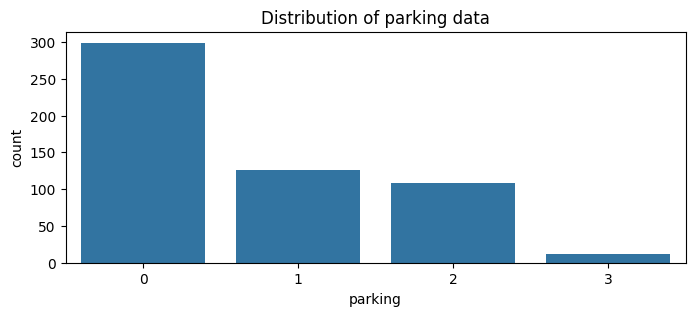

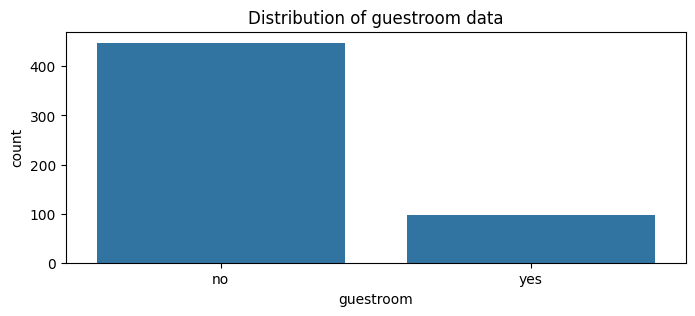

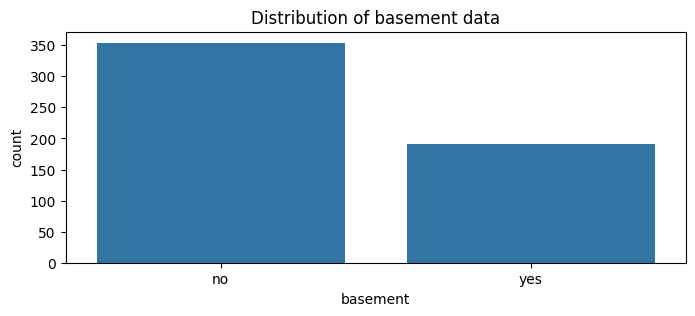

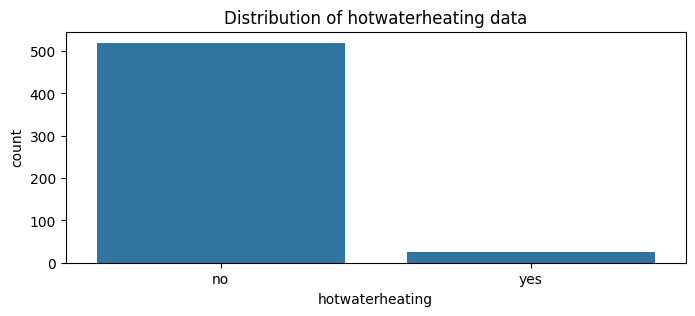

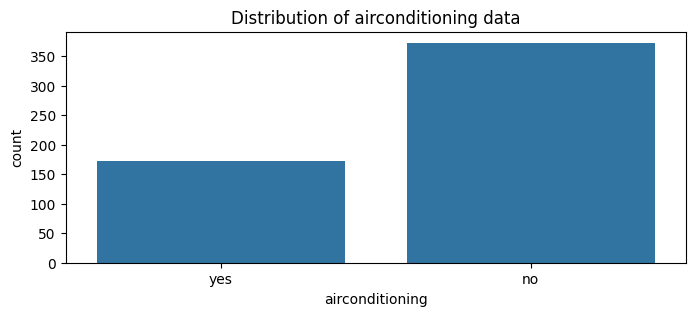

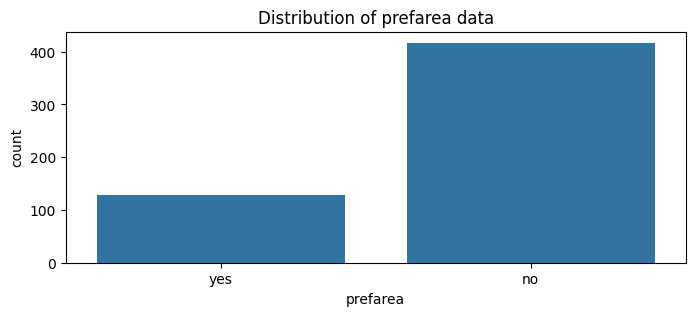

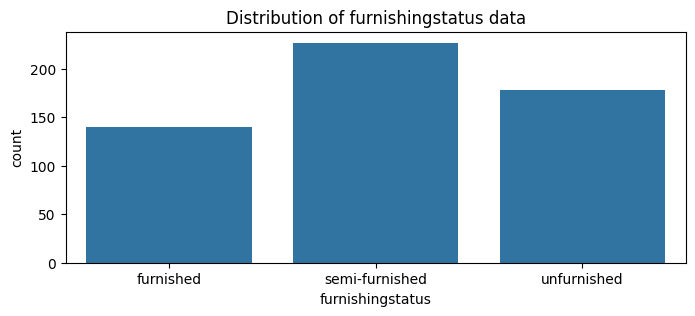

In [17]:
categorical_labels = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking', 'guestroom', 'basement', 'hotwaterheating', 
                      'airconditioning', 'prefarea', 'furnishingstatus']
for label in categorical_labels: # plots graph for every categorial label
    plt.figure(figsize=(8, 3))
    sns.countplot(x=label, data=df) # plots a bar graph
    plt.title(f'Distribution of {label} data') # Title of the graph plotted
    plt.show()

- **Seaborn is built on top of Matplotlib**, so you can freely mix them together in the same code.  
- The trick is:  
  1. Use **Seaborn** to create the plot (because it’s prettier and easier).  
  2. Use **Matplotlib** functions to customize things (labels, annotations, legends, etc.).  

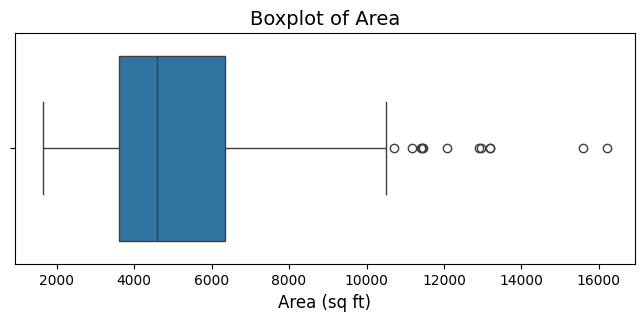

In [54]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df["area"])

plt.title("Boxplot of Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.show()

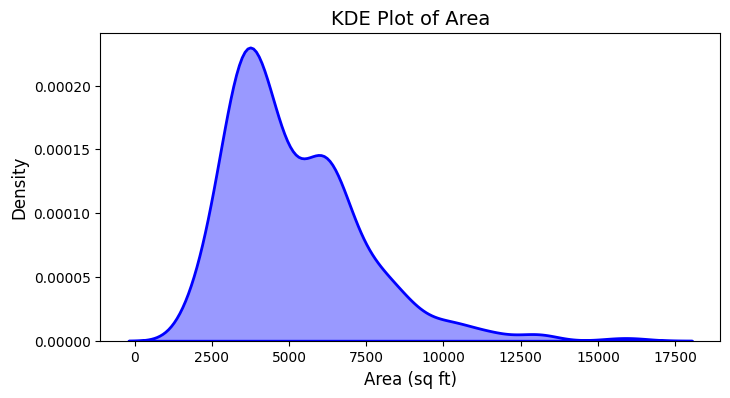

In [55]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

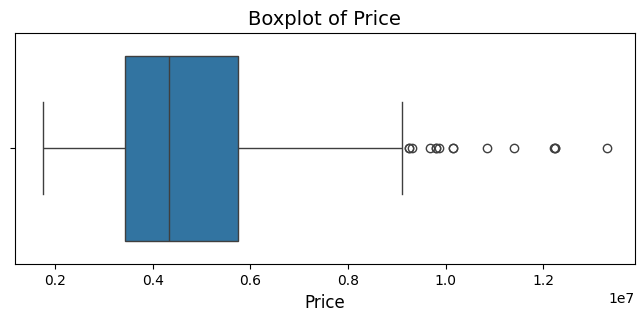

In [56]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df["price"])

plt.title("Boxplot of Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.show()

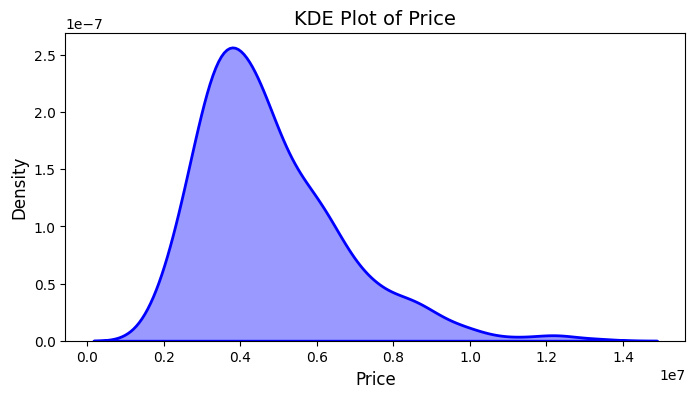

In [57]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df["price"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

**Analysis**
- When we look at the values of Area, the curve are not symmetric.
- They are skewed - meaning most values are clustered in a range, but a few extreme values (outliers) stretch the distribution toward one side.
  
**Why this is a problem for ML?**
- Many machine learning algorithms (like linear regression, logistic regression, KNN, neural networks) are sensitive to feature scaling.
- Outliers can distort scaling methods (like MinMaxScaler or StandardScaler) → making most data appear compressed into a small range.
- As a result, the model may give too much importance to these rare extreme values.

**Solution - using the clip function**
- clip() in pandas limits values to within a given range
- By clipping extreme values, You reduce skewness in the distribution.
- Scaling methods (like StandardScaler/MinMaxScaler) now work more effectively.
- The model becomes more robust and doesn’t overfit to rare outliers.

## Bivariate Analysis
- Bivariate data refers to a dataset where each observation is associated with two different variables.

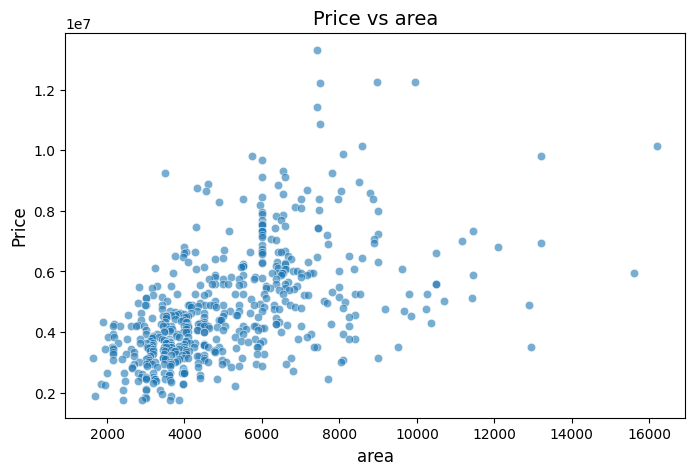

In [58]:
numeric_cols = ['area']   # you can add more numeric cols if available

# Bivariate plots for numerical features (scatterplots)
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y="price", data=df, alpha=0.6)
    plt.title(f"Price vs {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.show()

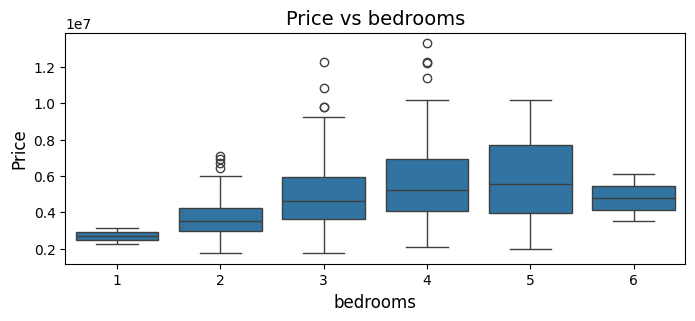

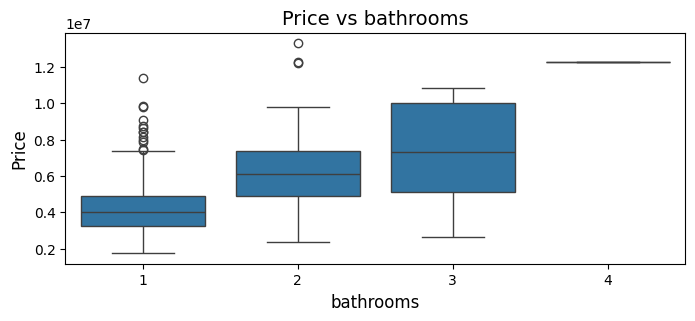

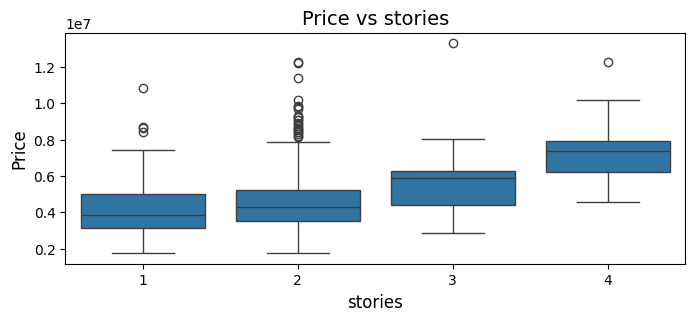

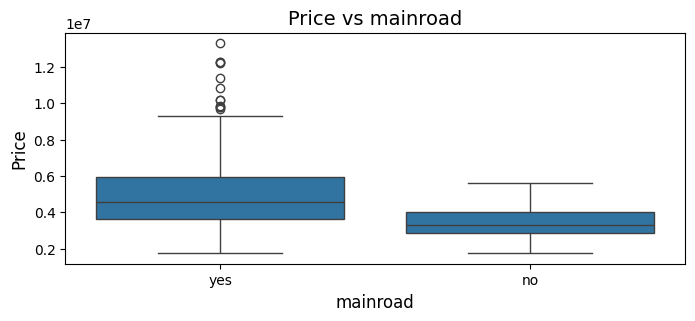

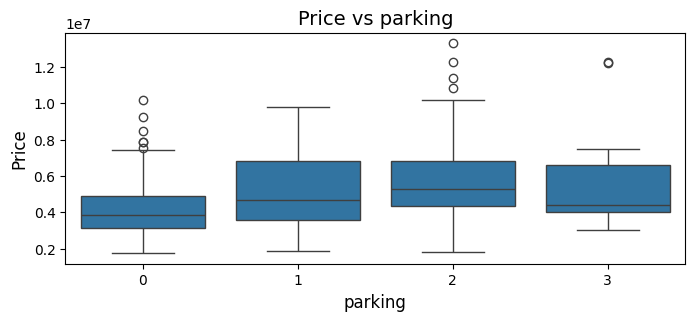

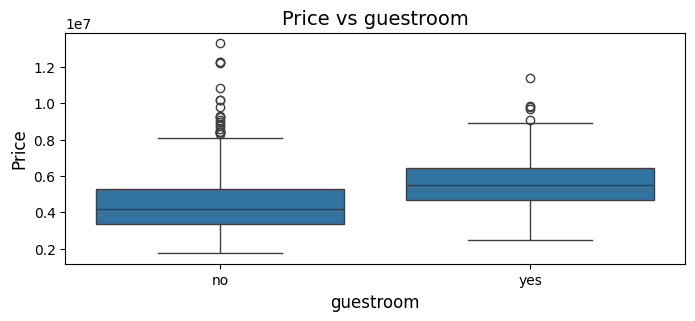

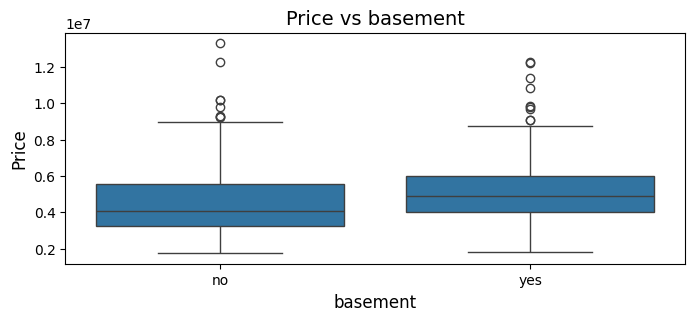

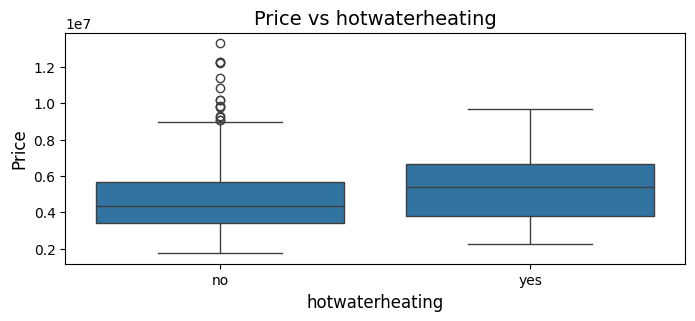

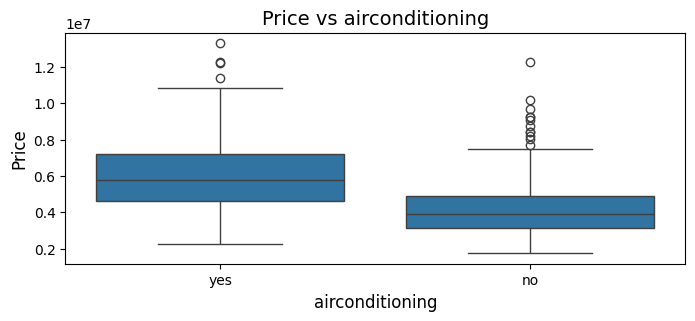

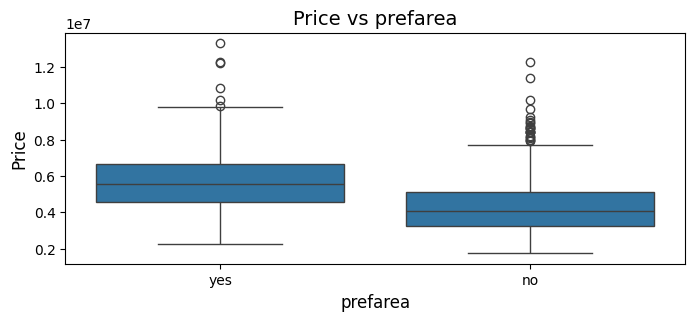

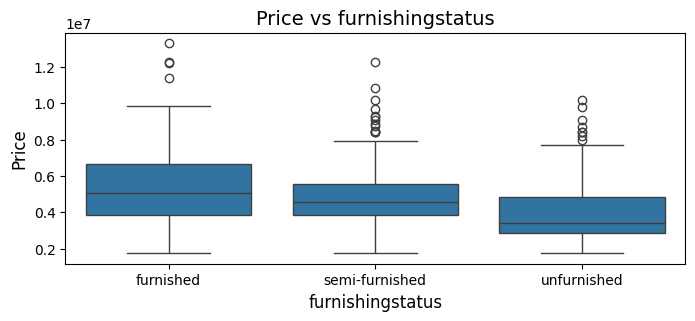

In [61]:
# Separate categorical and numerical columns
categorical_cols = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 
                    'parking', 'guestroom', 'basement', 
                    'hotwaterheating', 'airconditioning', 
                    'prefarea', 'furnishingstatus']

# Bivariate plots for categorical features (boxplots)
for col in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=col, y="price", data=df)
    plt.title(f"Price vs {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.show()

## Multivariate Analysis
- Multivariate data refers to datasets where each observation is associated with more than two attributes.

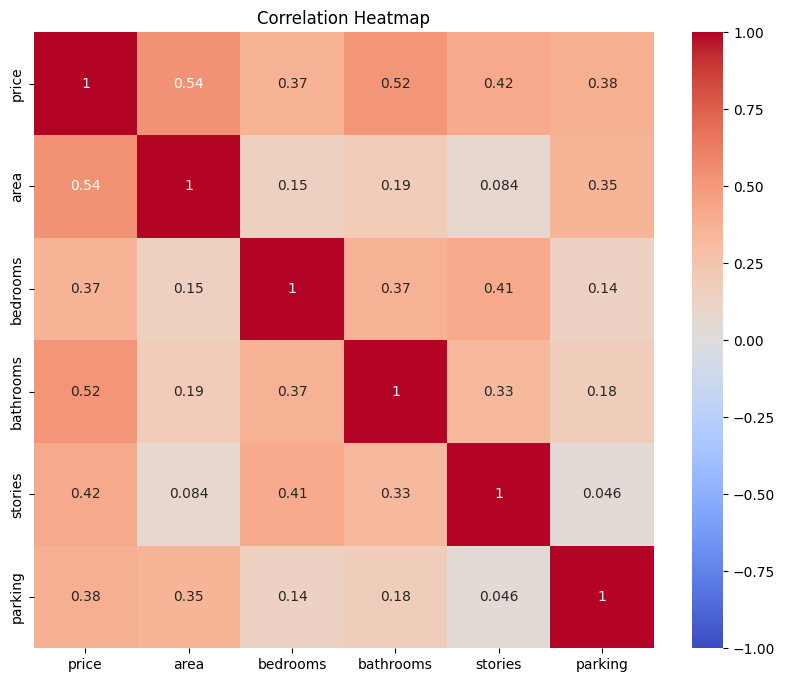

In [62]:
NumericalColumns=["price","area","bedrooms","bathrooms","stories","parking"]
plt.figure(figsize=(10, 8))
correlation_matrix = df[NumericalColumns].astype(float).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### EDA Observations
1.
2.